<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-3-_part_a_b_c.ipynb/blob/main/Jocelyn_Baduria_Assignment_3_part_c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1. Tensorflow
No auto differentiation 

In [89]:
!pip list | grep tensor

tensorboard                   2.0.2         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.0.0         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.0.1         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [90]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [91]:
!pip3 install tensorflow==2.0.0

In [136]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import matplotlib.pyplot as plt

%matplotlib inline
tf.__version__

'2.4.1'

1. Generate data: 3 dimensions input and 2 dimensions output 


> Utility functions



In [137]:
input_dim = 3
output_dim = 2
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

class Linear:
  def compute_predictions(features):
    return tf.matmul(features, w) + b

  def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

  def train_on_batch(x, y):
    with tf.GradientTape() as tape:
      predictions = compute_predictions(x)
      loss = compute_loss(y, predictions)
      # Note that `tape.gradient` works with a list as well (w, b).
      dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

In [7]:
# x, y

Let's generate some artificial data to demonstrate our model:

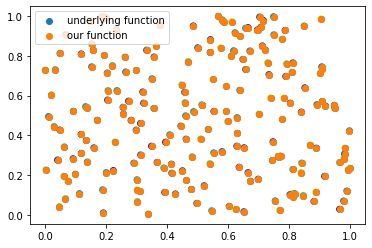

In [139]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# # # Make non-linear data, using 3 dimensional input data and 2 output neurons
n = 200
d1 = 3
d2 = 2
x = tf.Variable(tf.random.uniform(shape=(n, d1)))
y = tf.Variable(tf.random.uniform(shape=(n, d2)))

y_true = tf.matmul(tf.pow(x,2), w) + tf.matmul(x, w) + b
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.scatter(x[:, 0], x[:, 1], label='underlying function')
if y_true is not None:
  plt.scatter(x[:, 0], x[:, 1], label='our function')
  plt.legend()

Train the model and compute the cost function for each epoch

In [140]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.2636
Epoch 1: last batch loss = 0.2596
Epoch 2: last batch loss = 0.2557
Epoch 3: last batch loss = 0.2519
Epoch 4: last batch loss = 0.2483
Epoch 5: last batch loss = 0.2448
Epoch 6: last batch loss = 0.2414
Epoch 7: last batch loss = 0.2382
Epoch 8: last batch loss = 0.2350
Epoch 9: last batch loss = 0.2320


Model prediction

In [141]:
predictions = compute_predictions(x)

Plot the prediction

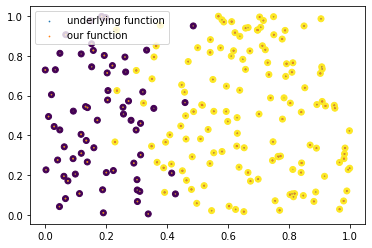

In [142]:
plt.scatter(x[:, 0], x[:, 1], c=predictions[:, 0] > 0.5)
plt.scatter(x[:, 0], x[:, 1], x[:, 2], label='underlying function')
if y_true is not None:
  plt.scatter(x[:, 0], x[:, 1], x[:, 2], label='our function')
  plt.legend()

2. Add ReLu function to learn the non-linear data

In [143]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def train_on_batch(x, y):
      with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
      # Note that `tape.gradient` works with a list as well (w, b).
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
      w.assign_sub(learning_rate * dloss_dw)
      b.assign_sub(learning_rate * dloss_db)
      return loss


relu = Relu()
input_ = tf.nn.relu([1, 0.5, 0, -0.5, -1]).numpy()
print(relu(input_))

[1.  0.5 0.  0.  0. ]


3. Train the 3dim and 2output generated data with Relu function

In [144]:
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    relu = Relu()
    # loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.2320
Epoch 1: last batch loss = 0.2320
Epoch 2: last batch loss = 0.2320
Epoch 3: last batch loss = 0.2320
Epoch 4: last batch loss = 0.2320
Epoch 5: last batch loss = 0.2320
Epoch 6: last batch loss = 0.2320
Epoch 7: last batch loss = 0.2320
Epoch 8: last batch loss = 0.2320
Epoch 9: last batch loss = 0.2320


4. Fit the model and compute the cost function


In [145]:
predictions = compute_predictions(x)

5. Plot the output post training as well as the real data  using tsne. Result: Similar plots but different values

In [146]:
import numpy as np
from sklearn.manifold import TSNE

view = TSNE(n_components=3, perplexity=10,learning_rate=200,random_state=123).fit_transform(x, predictions)

def plot_tsne(x, y_true, predictions):
  plt.figure(figsize=(10,7))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  # plt.plot(x, y_true[:,0], y_true[:,0], color='blue', alpha=0.5, label='True Value')
  plt.legend()

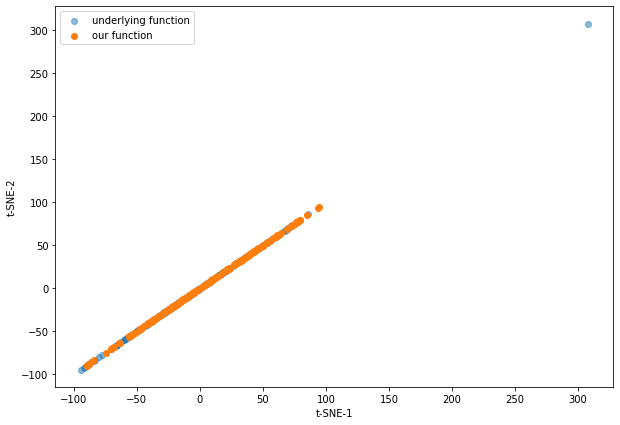

In [147]:
plot_tsne(x, y, predictions)